# Using tf.gradient to find derivatives

Enter input number
4.1
Done inputting number
[-0.19582547]
0.23229685332631406
4.1


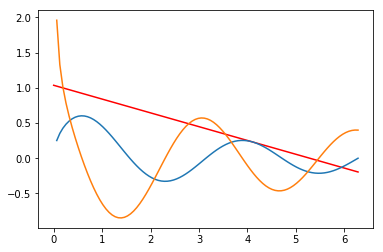

In [59]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from math import pi
import matplotlib.pyplot as mp

tf.reset_default_graph()

# Length of graph
length = np.linspace(0,pi*2,100)

# Point at which we want to find derivative at
x = tf.placeholder(tf.float32)

# Function
y=(1/tf.sqrt(x))*(tf.cos(x)*tf.sin(x))


# Running tf session
with tf.Session() as session:
    dy  = session.run(y,feed_dict={x:length})
    grad_out = session.run(tf.gradients(y,x),feed_dict={x:length})
    print("Enter input number")
    input_number = float(input())
    print("Done inputting number")
    grad_at = session.run(tf.gradients(y,x),feed_dict={x:input_number})
    print(grad_at)
    y_at = (1/np.sqrt(input_number))*(np.cos(input_number)*np.sin(input_number))
    x_at = input_number
    print(y_at)
    print(x_at)
    function = grad_at*(length - x_at) + y_at
    writer = tf.summary.FileWriter('logs', session.graph)
    writer.close()

    
mp.plot(length, function, '-r')
mp.plot(length,dy)
mp.plot(length,grad_out[0])

## Graph of f(x), F(x), and tan line to f(x) at inputted point
### Blue line is f(x)
### Orange line is F(x)
### Red line is f(x) at indicated point




![Tensorboard of this session](https://data.suryad.com/assets/blog-tfboard-2.png)


# Tensorboard of this computational graph

One thing to point out: there are two gradients being computed. This is because I computed the gradient twice for graphing and for the tan line. Obviously I could fix this, but the code could be easier for some to understand if the gradient is computed twice.